In [180]:
# Q1
import numpy as np

# Define function that simulates the sequence
def simulate(n):
    s = []
    x_sim = 0 # initial value that satisfies x_k \in [0,1]
    y_sim = 0 # initial value that satisfies y_k \in [0,1]
    for i in range(n):
        x_sim = float(np.random.uniform(x_sim,2/n,1)) # apply that z_t+1 \sim U(z_t,2/n)
        y_sim = float(np.random.uniform(y_sim,2/n,1)) # apply that z_t+1 \sim U(z_t,2/n)
        if x_sim<1 and y_sim<1:
            s.append((x_sim, y_sim))
    return s

# Test the function with  n = 10
n = 10
simulate(n)  

    

[(0.04963552084572809, 0.06149794120973926),
 (0.17258744709159904, 0.09166918150095879),
 (0.1739969527735912, 0.092356895801358),
 (0.17782834276989787, 0.17136737909538627),
 (0.1805856253237261, 0.18485178580110995),
 (0.18617053755447724, 0.1896161533026835),
 (0.1961791461842025, 0.1943742026879805),
 (0.19782041342834195, 0.199411739044586),
 (0.197944588112914, 0.19984732985549014),
 (0.19928951128181166, 0.19999499504708465)]

In [179]:
# Q2

# Define function
def minimize(seq):
    
    # extracting the x and y series from the sequence - not efficient coding, but helpsome
    n_se = len(seq)
    x = []
    y = []
    for i in range(n_se):
        x.append(sim[i][0])
    for i in range(n_se):
        y.append(sim[i][1])
    
    # Finding the dividend sums based on x_0 = x_k:
    x_star_list = []
    for j in x:
        x_0 = j
        sum = 0
        for i in range(len(x)):
            if sim[i][0]<x_0:
                sum += sim[i][1]
            if sim[i][0]>=x_0:
                sum += (1-sim[i][1])
        x_star_list.append([j, sum])
        
    # Finding the dividend sums based on x_0 = x_k:
    y_star_list = []
    for j in y:
        y_0 = j
        sum = 0
        for i in range(len(y)):
            if sim[i][1]<y_0:
                sum += sim[i][0]
            if sim[i][1]>=y_0:
                sum += (1-sim[i][0])
        y_star_list.append([j, sum])

    # Finding the min sum value and corresponding x_star
    min_sum_x = min([x_star_list[i][1] for i in range(len(x_star_list))])
    x_star = [x_star_list[i][0] for i in range(len(x_star_list)) if x_star_list[i][1] ==min_sum_x]
    
    # Finding the min sum value and corresponding y_star
    min_sum_y = min([y_star_list[i][1] for i in range(len(y_star_list))])
    y_star = [y_star_list[i][0] for i in range(len(y_star_list)) if y_star_list[i][1] ==min_sum_y]
    
    return y_star[0] # only yields y* as this is relevant for Q3

# Check if the minimuze function works
n = 10
sim = simulate(n)
y_star = minimize(sim)
print(y_star)


0.19999952236232035


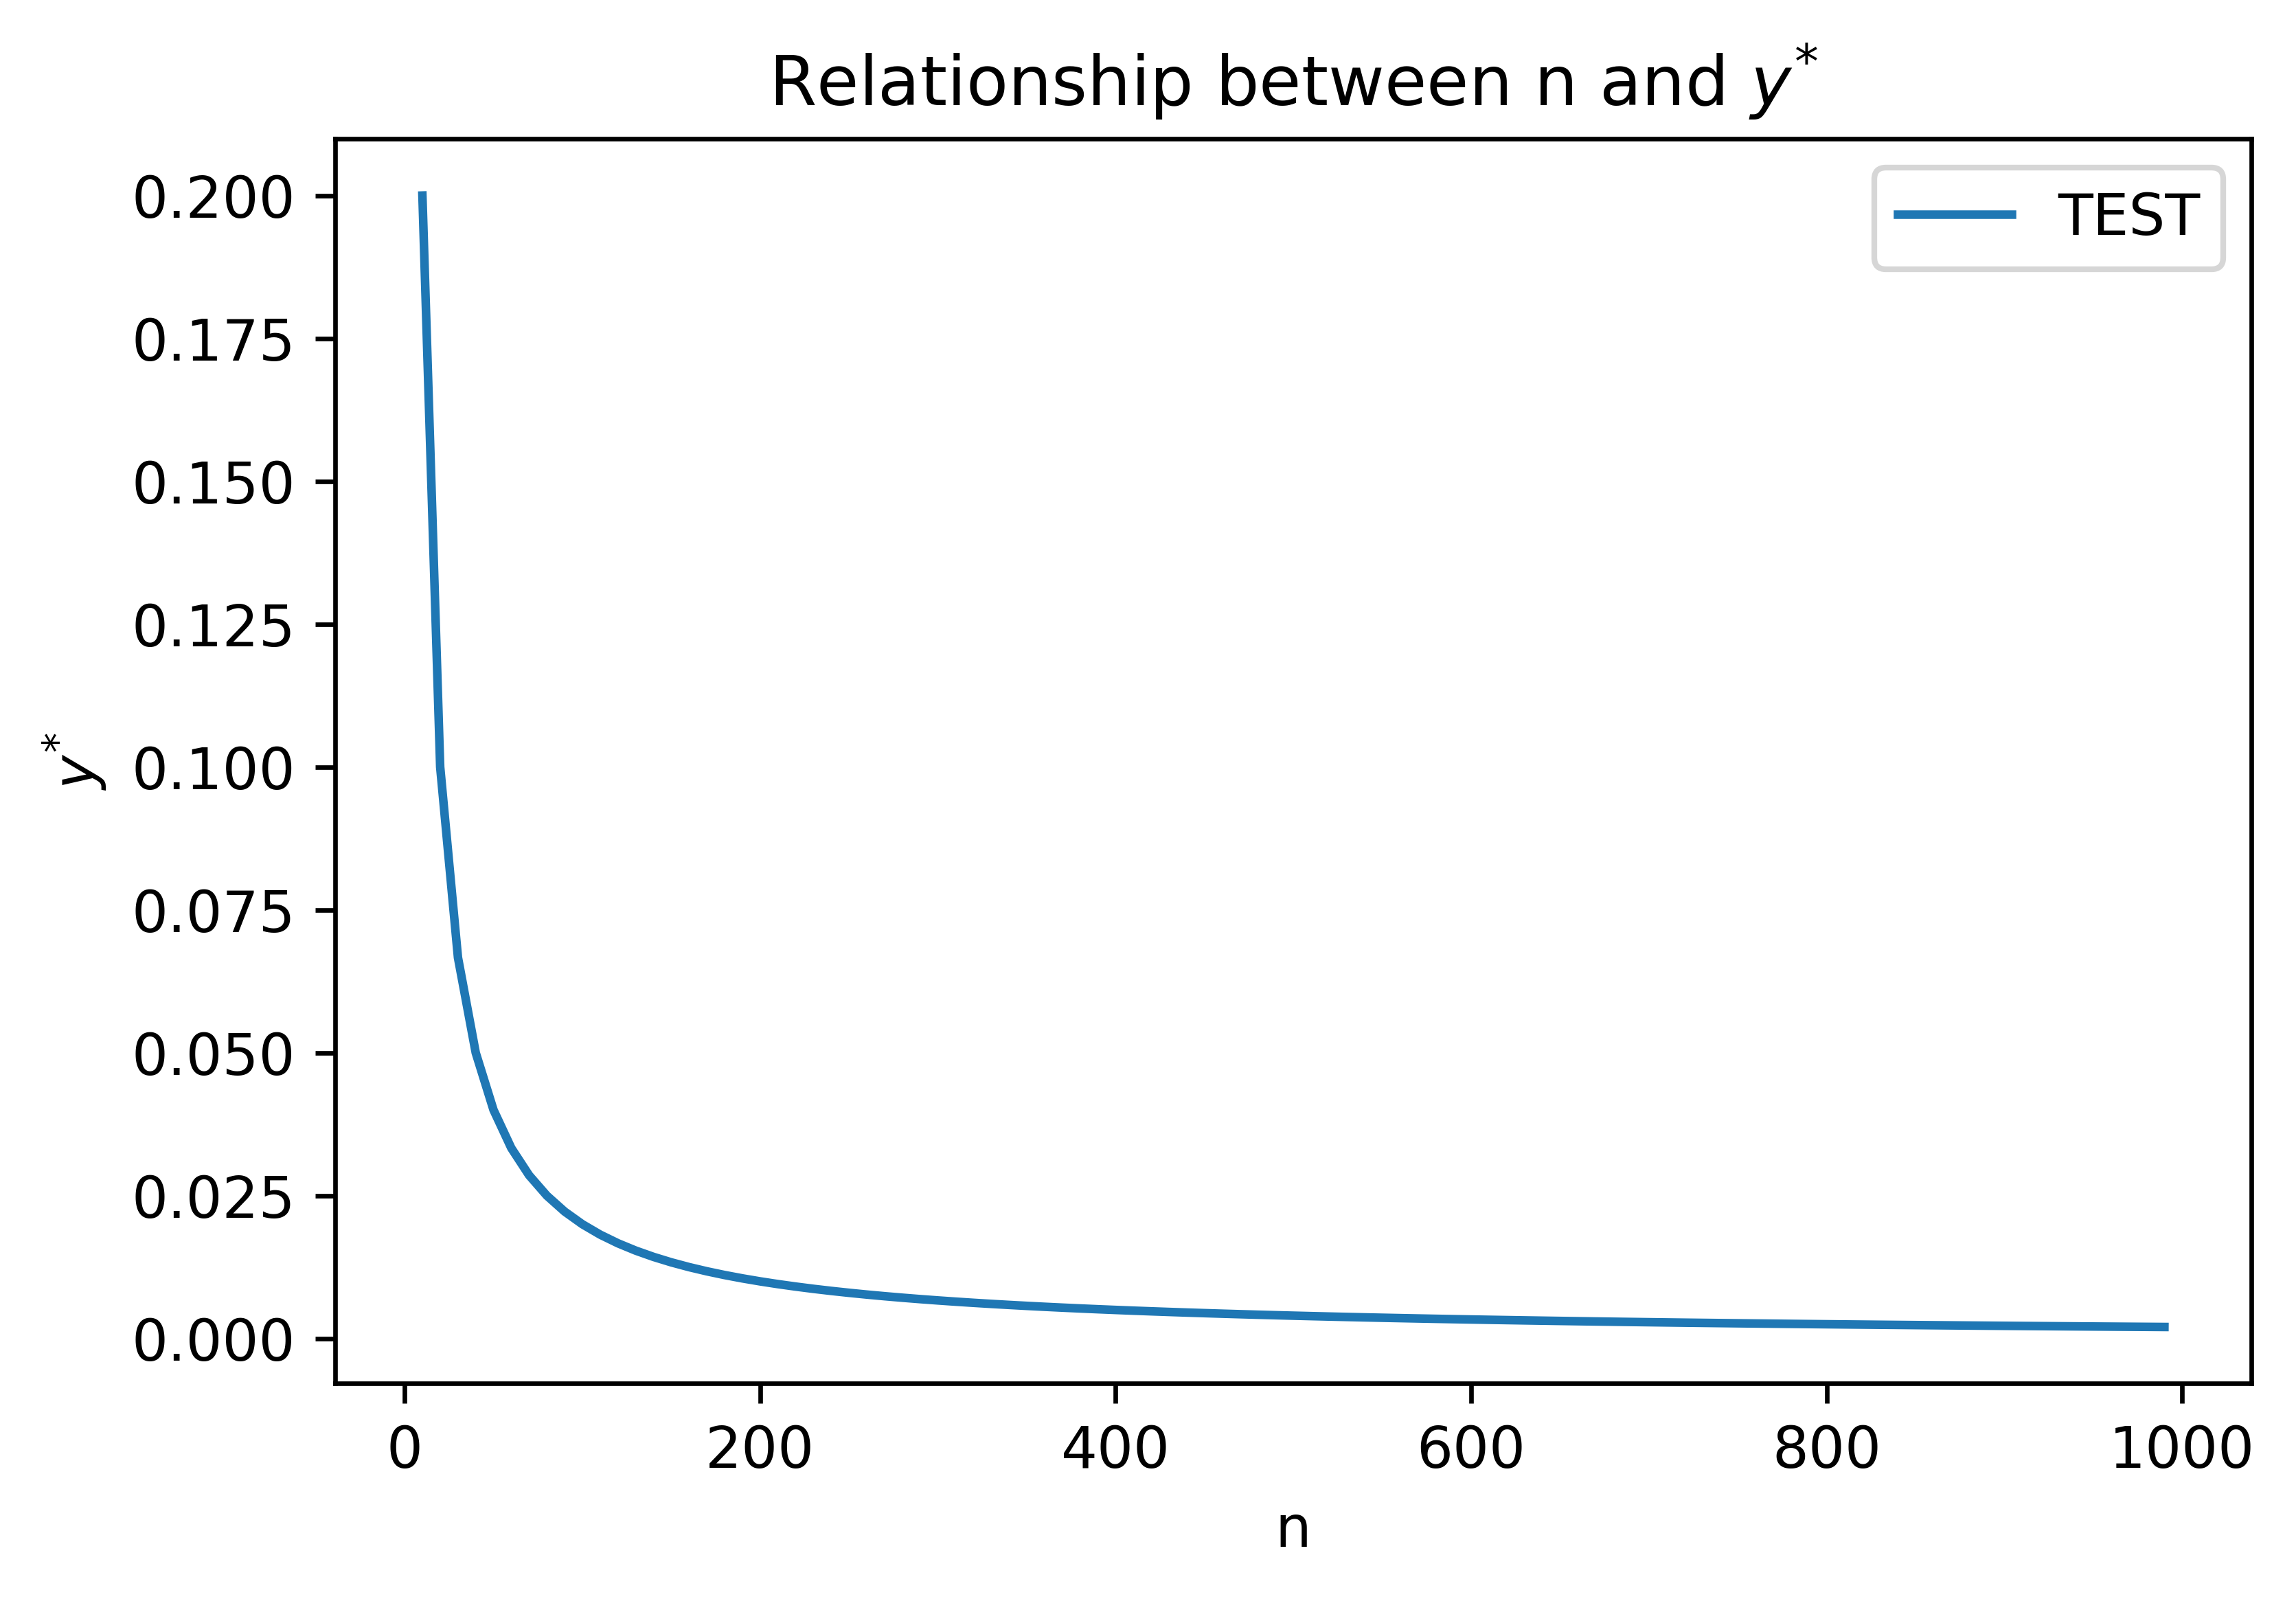

In [178]:
# Q3
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(10,1000,10)

y_stars = []
for i in n:
    sim = simulate(i)
    y_star_sim = minimize(sim)
    y_stars.append(y_star_sim)

# Plotting
plt.figure(figsize=(6,4),dpi=600)
plt.plot(n, y_stars, label='TEST')
plt.xlabel('n')
plt.ylabel('$y^{*}$')
plt.legend(loc='best')
plt.title('Relationship between n and $y^{*}$', fontsize=12)
plt.show()

$y^{*}$ converges towards zero as n goes towards inifity. This makes sense as the draws from the uniform distribution must come from a smaller and smaller interval which is closer and closer to zero as n becomes large.